In [1]:
import torch 
bad_pred = torch.load('/home/kandelaki/git/SAM-Adapter-PyTorch/examples/pred_0')
bat_gt = torch.load('/home/kandelaki/git/SAM-Adapter-PyTorch/examples/gt_0')



In [2]:
from torchmetrics.classification import BinaryJaccardIndex
print(good_pred)
threshold = 0.5
good_pred = 1 - good_pred
bad_pred = 1 - bad_pred

metric = BinaryJaccardIndex(threshold=threshold)
metric.update(good_pred, good_gt)
print(metric.compute())

metric.reset()
metric.update(bad_pred, bat_gt)
print(metric.compute())

thresholded_good_pred = good_pred > threshold
print(thresholded_good_pred.shape)
print()
from torchvision import transforms
img = transforms.ToPILImage()(thresholded_good_pred.squeeze(0).float())
import matplotlib.pyplot as plt
plt.imshow(img)

NameError: name 'good_pred' is not defined

In [ ]:
from PIL import Image
from lang_sam import LangSAM

model = LangSAM("vit_b", "/home/kandelaki/git/SAM-Adapter-PyTorch/pretrained/sam_vit_b_01ec64.pth")
image_pil = Image.open("/home/kandelaki/git/SAM-Adapter-PyTorch/load/img/test/8.png").convert("RGB")
text_prompt = "Solar Panel"
masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

/home/kandelaki/miniconda3/envs/sam-adapter/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
Model loaded from /home/kandelaki/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


KeyboardInterrupt: 

In [ ]:
boxes

tensor([[ 2.6817e+01,  4.0142e+02,  1.0236e+03,  7.5127e+02],
        [ 2.2596e+02, -5.1651e-03,  3.9342e+02,  2.2408e+02]])

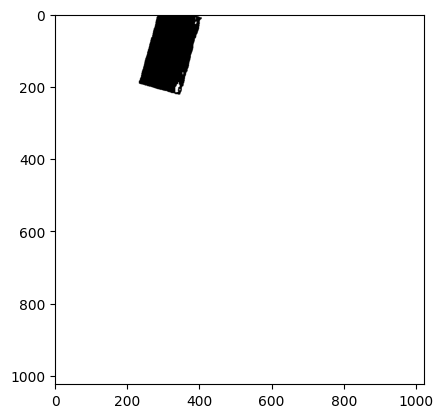

In [ ]:
from torchvision import transforms
img = transforms.ToPILImage()(masks.squeeze(0).float())
import matplotlib.pyplot as plt
plt.imshow(img)

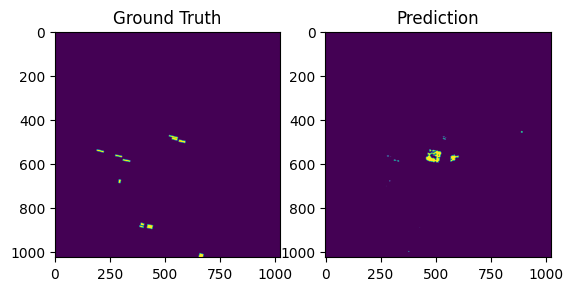

: 

In [ ]:
# Create subplots using plt.subplots with captions "Ground Truth" and "Prediction"
good_pred = torch.load('/home/kandelaki/git/SAM-Adapter-PyTorch/examples/pred_15')
good_gt = torch.load('/home/kandelaki/git/SAM-Adapter-PyTorch/examples/gt_15')

from torchvision import transforms
import matplotlib.pyplot as plt
good_gt = 1 - good_gt
good_pred = 1 - good_pred
threshold = 0.5
pred = good_pred > threshold
gt = transforms.ToPILImage()(good_gt.squeeze(0).float())
pred = transforms.ToPILImage()(pred.squeeze(0).float())
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gt)
ax1.set_title('Ground Truth')
ax2.imshow(pred)
ax2.set_title('Prediction')
plt.show()

In [ ]:
def create_overlay_mask_figure(self, image, mask, threshold=0.5):
        # overlay mask on image
        mask = 1 - mask
        mask = mask > threshold
        
        
        mask = transforms.ToPILImage()(mask.squeeze(0).float())
        image = transforms.ToPILImage()(image.squeeze(0).float())
        
        fig = plt.figure()
        fig.set_figheight(15)
        fig.set_figwidth(15)
        plt.imshow(image)
        return fig

In [ ]:
import torch
gt = torch.load('/home/kandelaki/git/SAM-Adapter-PyTorch/examples/gt_1')
pred = torch.load('/home/kandelaki/git/SAM-Adapter-PyTorch/examples/pred_1')

In [ ]:
from PIL import Image
from torchvision import transforms 
from torchmetrics.classification import BinaryJaccardIndex

gt = 1 - gt
pred = 1 - pred
print(gt > 0.5)

tensor([[[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]]])


In [ ]:
jaccard = BinaryJaccardIndex(threshold=0.5, ignore_index=0)
jaccard.update(pred, gt)
a = jaccard.compute()
print(a)

jaccard_not_ignore = BinaryJaccardIndex(threshold=0.5, ignore_index=None)
jaccard_not_ignore.update(pred, gt)
b = jaccard_not_ignore.compute()
print(b)

tensor(0.4311)
tensor(0.2957)


In [ ]:
gt_1 = torch.load('/home/kandelaki/git/SAM-Adapter-PyTorch/examples/gt_1')
pred_1 = torch.load('/home/kandelaki/git/SAM-Adapter-PyTorch/examples/pred_1')

jacard1 = BinaryJaccardIndex(threshold=0.5, ignore_index=0)
jacard1.update(pred_1, gt_1)
a = jacard1.compute()
print(a)

tensor(0.9995)
